In [185]:
!pip -q install plotly 
!pip -q install yellowbrick
!pip -q install pandas
!pip -q install matplotlib
!pip -q install seaborn

In [186]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [187]:
base_carros = pd.read_csv('cars.csv')

In [188]:
base_carros

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Mercedes,C-Class,2019,22000,Diesel,Automatic,First,16,1950,191,5,2900000
96,97,Toyota,Innova Crysta,2017,38000,Diesel,Manual,Second,13,2755,171,7,1400000
97,98,Ford,EcoSport,2018,26000,Petrol,Manual,Third,18,1497,121,5,750000
98,99,Hyundai,Verna,2019,24000,Petrol,Automatic,Second,17,1497,113,5,850000


In [189]:
base_carros = base_carros[['Brand','Model','Year','Kilometers_Driven','Owner_Type','Seats','Price']]
base_carros
#Reduzindo base de dados para ter somente os dados relevantes.

,Brand,Model,Year,Kilometers_Driven,Owner_Type,Seats,Price
0,Toyota,Corolla,2018,50000,First,5,800000
1,Honda,Civic,2019,40000,Second,5,1000000
2,Ford,Mustang,2017,20000,First,4,2500000
3,Maruti,Swift,2020,30000,Third,5,600000
4,Hyundai,Sonata,2016,60000,Second,5,850000
...,...,...,...,...,...,...,...
95,Mercedes,C-Class,2019,22000,First,5,2900000
96,Toyota,Innova Crysta,2017,38000,Second,7,1400000
97,Ford,EcoSport,2018,26000,Third,5,750000
98,Hyundai,Verna,2019,24000,Second,5,850000


Decidi transformar o valor do preço dos carros de Rúpias Indianas para Reais Brasileiros, para trabalhar com medidas que possuo melhor noção quantitativa.

In [190]:

base_carros['Price'] = np.multiply(base_carros['Price'] , 0.062)


C:\Users\ferna\AppData\Local\Temp\ipykernel_19956\2122226254.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [191]:
base_carros

,Brand,Model,Year,Kilometers_Driven,Owner_Type,Seats,Price
0,Toyota,Corolla,2018,50000,First,5,49600.0
1,Honda,Civic,2019,40000,Second,5,62000.0
2,Ford,Mustang,2017,20000,First,4,155000.0
3,Maruti,Swift,2020,30000,Third,5,37200.0
4,Hyundai,Sonata,2016,60000,Second,5,52700.0
...,...,...,...,...,...,...,...
95,Mercedes,C-Class,2019,22000,First,5,179800.0
96,Toyota,Innova Crysta,2017,38000,Second,7,86800.0
97,Ford,EcoSport,2018,26000,Third,5,46500.0
98,Hyundai,Verna,2019,24000,Second,5,52700.0


In [192]:
base_carros.describe()

,Year,Kilometers_Driven,Seats,Price
count,100.00000,100.000000,100.000000,100.00000
mean,2018.39000,28150.000000,5.230000,97588.00000
std,1.17116,9121.375716,0.750151,62016.40591
min,2016.00000,10000.000000,4.000000,27900.00000
25%,2017.75000,22000.000000,5.000000,43400.00000
50%,2018.00000,27000.000000,5.000000,80600.00000
75%,2019.00000,32000.000000,5.000000,155000.00000
max,2021.00000,60000.000000,7.000000,248000.00000


Importante perceber que a nossa base de dados não é grande, vamos perceber como isso afeta nossos algoritmos de classificação mais a frente.

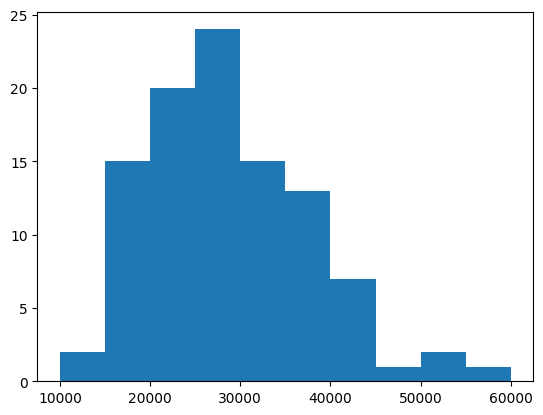

In [193]:
plt.hist(x = base_carros['Kilometers_Driven']);
#Descobrindo o formato geral dos dados de kilometragem dos nossos carros usados.

In [194]:
grafico = px.scatter_matrix(base_carros, dimensions=['Brand', 'Price', 'Kilometers_Driven'], color = 'Price')
grafico.show()

Neste último gráfico conseguimos informações relevantes do nossos dados, entre elas:
    - O gráfico de marca por preço, mostrando a influencia direta entre esses dois > marcas de luxo são mais claras no mapeamento de calor do preço;
    - O gráfico de marca por kilometragem > marcas de luxo normalmente tem kilometragem mais baixa, o que ajuda a preservar seu valor de revenda e exibe o estilo de vida dos donos em relação a aquele carro.
                Além disso, carros mais baratos tendem a ter uma maior kilometragem, pois servem mais como uma ferramenta e não tem o aspecto de mostrar status social como os de luxo, além de ser menos alvejados por criminosos. 

Assim chegamos a conclusões socio-econômicas interessantes desses dados que vem da índia, que é um país em desenvolvimento parecido com o Brasil nestes aspectos citados acima.

In [195]:
grafico = px.treemap(base_carros, path=['Brand','Owner_Type','Model','Price'])
grafico.show()

Aqui vemos uma relação proporcional entre a desvalorização e a quantidade de revendas, com pequenas situações que podem fugir deste cenário por conta do modelo do veículo, que já é mais caro a priori.

In [196]:
base_carros

,Brand,Model,Year,Kilometers_Driven,Owner_Type,Seats,Price
0,Toyota,Corolla,2018,50000,First,5,49600.0
1,Honda,Civic,2019,40000,Second,5,62000.0
2,Ford,Mustang,2017,20000,First,4,155000.0
3,Maruti,Swift,2020,30000,Third,5,37200.0
4,Hyundai,Sonata,2016,60000,Second,5,52700.0
...,...,...,...,...,...,...,...
95,Mercedes,C-Class,2019,22000,First,5,179800.0
96,Toyota,Innova Crysta,2017,38000,Second,7,86800.0
97,Ford,EcoSport,2018,26000,Third,5,46500.0
98,Hyundai,Verna,2019,24000,Second,5,52700.0


In [197]:
#Previsores
X_carros = base_carros.iloc[:,0:6].values
X_carros

array([['Toyota', 'Corolla', 2018, 50000, 'First', 5],
       ['Honda', 'Civic', 2019, 40000, 'Second', 5],
       ['Ford', 'Mustang', 2017, 20000, 'First', 4],
       ['Maruti', 'Swift', 2020, 30000, 'Third', 5],
       ['Hyundai', 'Sonata', 2016, 60000, 'Second', 5],
       ['Tata', 'Nexon', 2019, 35000, 'First', 5],
       ['Mahindra', 'Scorpio', 2018, 45000, 'Second', 7],
       ['Volkswagen', 'Polo', 2020, 25000, 'First', 5],
       ['Audi', 'A4', 2017, 30000, 'First', 5],
       ['BMW', 'X1', 2019, 20000, 'Second', 5],
       ['Mercedes', 'C-Class', 2018, 28000, 'First', 5],
       ['Ford', 'Endeavour', 2017, 35000, 'Second', 7],
       ['Hyundai', 'Creta', 2019, 22000, 'Third', 5],
       ['Tata', 'Harrier', 2018, 40000, 'First', 5],
       ['Maruti', 'Ertiga', 2020, 18000, 'First', 7],
       ['Honda', 'City', 2017, 42000, 'Second', 5],
       ['Volkswagen', 'Tiguan', 2018, 32000, 'First', 5],
       ['Audi', 'Q3', 2016, 38000, 'Second', 5],
       ['BMW', '5 Series', 2019, 240

In [198]:
#Classificadores
Y_carros = base_carros.iloc[:,6].values
Y_carros

array([ 49600.,  62000., 155000.,  37200.,  52700.,  46500.,  55800.,
        40300., 136400., 167400., 142600., 124000.,  52700.,  99200.,
        52700.,  40300., 111600., 117800., 186000., 155000.,  86800.,
        34100.,  52700.,  37200.,  74400.,  99200., 198400., 173600.,
       167400., 155000.,  37200.,  49600.,  80600.,  43400.,  46500.,
        31000., 124000., 217000., 248000.,  40300.,  93000.,  27900.,
        31000.,  43400.,  52700.,  99200., 186000., 198400., 148800.,
       111600., 167400.,  34100.,  31000.,  43400.,  40300., 161200.,
       173600., 179800.,  86800.,  46500.,  52700.,  37200.,  74400.,
        99200., 198400., 173600., 167400., 155000.,  37200.,  49600.,
        80600.,  43400.,  46500.,  31000., 124000., 217000., 248000.,
        40300.,  93000.,  27900.,  31000.,  43400.,  52700.,  99200.,
       186000., 198400., 148800., 111600., 167400.,  34100.,  31000.,
        43400.,  40300., 161200., 173600., 179800.,  86800.,  46500.,
        52700.,  372

//Encodificar atributos categóricos (Strings principalmente)

In [199]:
from sklearn.preprocessing import LabelEncoder

In [200]:
label_encoder_brand = LabelEncoder()

In [201]:
X_carros[:,0]

array(['Toyota', 'Honda', 'Ford', 'Maruti', 'Hyundai', 'Tata', 'Mahindra',
       'Volkswagen', 'Audi', 'BMW', 'Mercedes', 'Ford', 'Hyundai', 'Tata',
       'Maruti', 'Honda', 'Volkswagen', 'Audi', 'BMW', 'Mercedes',
       'Toyota', 'Ford', 'Hyundai', 'Tata', 'Mahindra', 'Volkswagen',
       'Audi', 'BMW', 'Mercedes', 'Toyota', 'Ford', 'Hyundai', 'Tata',
       'Maruti', 'Honda', 'Volkswagen', 'Audi', 'BMW', 'Mercedes',
       'Toyota', 'Ford', 'Hyundai', 'Tata', 'Maruti', 'Honda',
       'Volkswagen', 'Audi', 'BMW', 'Mercedes', 'Toyota', 'Ford',
       'Hyundai', 'Tata', 'Mahindra', 'Volkswagen', 'Audi', 'BMW',
       'Mercedes', 'Toyota', 'Ford', 'Hyundai', 'Tata', 'Mahindra',
       'Volkswagen', 'Audi', 'BMW', 'Mercedes', 'Toyota', 'Ford',
       'Hyundai', 'Tata', 'Maruti', 'Honda', 'Volkswagen', 'Audi', 'BMW',
       'Mercedes', 'Toyota', 'Ford', 'Hyundai', 'Tata', 'Maruti', 'Honda',
       'Volkswagen', 'Audi', 'BMW', 'Mercedes', 'Toyota', 'Ford',
       'Hyundai', 'Tata', 'Mah

In [202]:
X_carros[:,0] = label_encoder_brand.fit_transform(X_carros[:,0])

In [203]:
X_carros[0]

array([9, 'Corolla', 2018, 50000, 'First', 5], dtype=object)

Usando essa tática pra cada atributo categórico de tipon string...

In [204]:
label_encoder_model = LabelEncoder()
label_encoder_owner = LabelEncoder()

In [205]:
X_carros[:,1] = label_encoder_model.fit_transform(X_carros[:,1])

In [206]:
X_carros[:,4] = label_encoder_owner.fit_transform(X_carros[:,4])

In [207]:
X_carros

array([[9, 15, 2018, 50000, 0, 5],
       [3, 14, 2019, 40000, 1, 5],
       [2, 30, 2017, 20000, 0, 4],
       [6, 42, 2020, 30000, 2, 5],
       [4, 41, 2016, 60000, 1, 5],
       [8, 31, 2019, 35000, 0, 5],
       [5, 40, 2018, 45000, 1, 7],
       [10, 33, 2020, 25000, 0, 5],
       [0, 4, 2017, 30000, 0, 5],
       [1, 53, 2019, 20000, 1, 5],
       [7, 11, 2018, 28000, 0, 5],
       [2, 20, 2017, 35000, 1, 7],
       [4, 16, 2019, 22000, 2, 5],
       [8, 27, 2018, 40000, 0, 5],
       [6, 21, 2020, 18000, 0, 7],
       [3, 13, 2017, 42000, 1, 5],
       [10, 47, 2018, 32000, 0, 5],
       [0, 34, 2016, 38000, 1, 5],
       [1, 1, 2019, 24000, 0, 5],
       [7, 25, 2017, 26000, 1, 5],
       [9, 28, 2018, 50000, 0, 7],
       [2, 22, 2020, 15000, 2, 5],
       [4, 50, 2019, 26000, 1, 5],
       [8, 7, 2020, 18000, 0, 5],
       [5, 44, 2021, 10000, 0, 4],
       [10, 32, 2017, 32000, 1, 5],
       [0, 6, 2018, 28000, 0, 5],
       [1, 54, 2019, 22000, 1, 5],
       [7, 17, 2017, 

Agora que todos os dados estão em formato numérico, usaremos o one hot encoder para retirar o 'peso' das categorias numeradas.

In [208]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [209]:
onehotencoder_carros = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [0,1,4])], remainder='passthrough')

In [210]:
X_carros = onehotencoder_carros.fit_transform(X_carros).toarray()

In [211]:
X_carros

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 2.018e+03, 5.000e+04,
        5.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.019e+03, 4.000e+04,
        5.000e+00],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 2.017e+03, 2.000e+04,
        4.000e+00],
       ...,
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 2.018e+03, 2.600e+04,
        5.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.019e+03, 2.400e+04,
        5.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.020e+03, 1.800e+04,
        5.000e+00]])

In [212]:
X_carros[0]

array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
       2.018e+03, 5.000e+04, 5.000e+00])

In [213]:
X_carros.shape

(100, 75)

//Escalonamento dos valores

In [214]:
from sklearn.preprocessing import StandardScaler
scaler_carros = StandardScaler()
X_carros = scaler_carros.fit_transform(X_carros)

In [215]:
X_carros

array([[-0.33333333, -0.33333333, -0.35156152, ..., -0.33468073,
         2.40753993, -0.30814935],
       [-0.33333333, -0.33333333, -0.35156152, ...,  0.52347499,
         1.30569099, -0.30814935],
       [-0.33333333, -0.33333333,  2.84445234, ..., -1.19283646,
        -0.89800689, -1.64792914],
       ...,
       [-0.33333333, -0.33333333,  2.84445234, ..., -0.33468073,
        -0.23689752, -0.30814935],
       [-0.33333333, -0.33333333, -0.35156152, ...,  0.52347499,
        -0.45726731, -0.30814935],
       [-0.33333333, -0.33333333, -0.35156152, ...,  1.38163072,
        -1.11837667, -0.30814935]])

In [216]:
X_carros[0]

array([-0.33333333, -0.33333333, -0.35156152, -0.25264558, -0.35156152,
       -0.22941573, -0.25264558, -0.33333333, -0.35156152,  3.        ,
       -0.33333333, -0.14285714, -0.10050378, -0.14285714, -0.14285714,
       -0.10050378, -0.14285714, -0.14285714, -0.17586311, -0.14285714,
       -0.14285714, -0.14285714, -0.17586311, -0.14285714, -0.10050378,
       -0.10050378,  9.94987437, -0.10050378, -0.14285714, -0.14285714,
       -0.14285714, -0.10050378, -0.10050378, -0.10050378, -0.14285714,
       -0.14285714, -0.10050378, -0.14285714, -0.10050378, -0.10050378,
       -0.14285714, -0.17586311, -0.10050378, -0.14285714, -0.10050378,
       -0.10050378, -0.14285714, -0.14285714, -0.14285714, -0.14285714,
       -0.14285714, -0.10050378, -0.10050378, -0.10050378, -0.14285714,
       -0.14285714, -0.14285714, -0.14285714, -0.10050378, -0.14285714,
       -0.14285714, -0.17586311, -0.14285714, -0.14285714, -0.10050378,
       -0.14285714, -0.14285714, -0.14285714, -0.14285714,  1.12

//Divisão de base treino e base teste

In [217]:
from sklearn.model_selection import train_test_split

In [218]:
X_carros_treinamento, X_carros_teste, Y_carros_treinamento, Y_carros_teste = train_test_split(X_carros,Y_carros,test_size = 0.25, random_state = 0)

In [219]:
X_carros_treinamento.shape

(75, 75)

In [220]:
Y_carros_treinamento.shape

(75,)

In [221]:
X_carros_teste.shape, Y_carros_teste.shape

((25, 75), (25,))

//Salvar variáveis com pickle

In [222]:
import pickle

In [223]:
with open('carros.pkl',mode= 'wb') as f:
    pickle.dump([X_carros_treinamento,Y_carros_treinamento,X_carros_teste,Y_carros_teste],f)